INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/isha_dsa.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.
INFO: --- Starting Scintillation Pipeline for isha ---
INFO: Noise modelling disabled by config.
INFO: Loading and processing raw data...
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/isha.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying RFI masking.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "isha",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/isha.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "padding_factor": 0.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 2,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": false,
      "enable_intra_pulse_analysis": true,
      "intra_pulse_time_bins": 5
    },
    

INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1263.
INFO: Using symmetric noise window of duration 15 bins.
INFO: Using downsampled noise statistics from bins 77 to 78.
Iterative RFI Masking in Frequency Domain: 100%|██████████| 5/5 [00:00<00:00, 740.83it/s]
INFO: Masked 0 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying polynomial baseline subtraction...
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1263.
INFO: Performing order-1 polynomial baseline subtraction using off-pulse spectrum.
INFO: Baseline subtraction complete.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
I

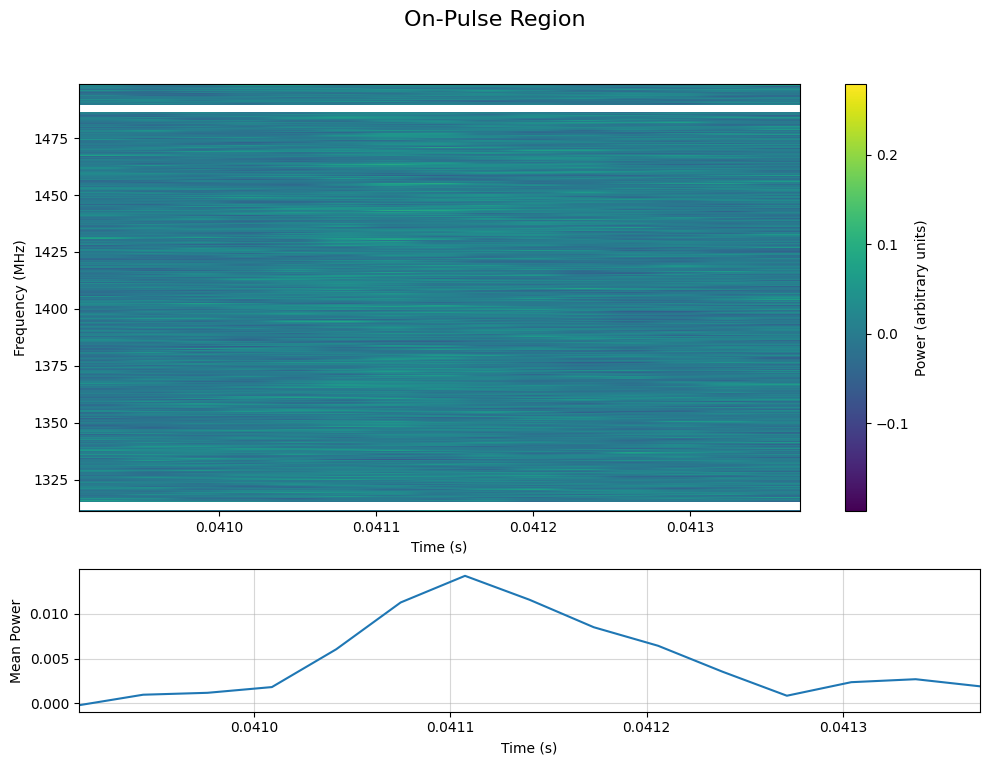

INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 1048)
INFO: Generating diagnostic plot: Off-Pulse (Noise) Region
INFO: Diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/isha_off_pulse_diagnostic.png


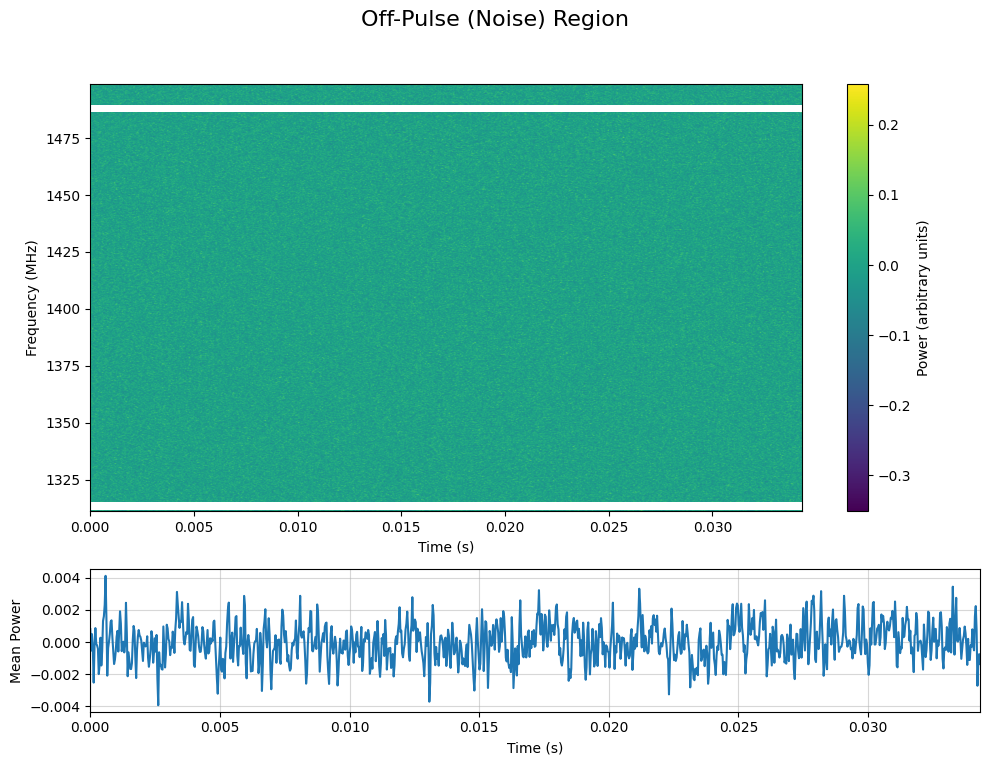

INFO: On/Off pulse diagnostic plots saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics
INFO: Generating baseline fit diagnostic plot.
INFO: Generating baseline fit diagnostic plot.
INFO: Baseline diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/isha_baseline_diagnostic.png


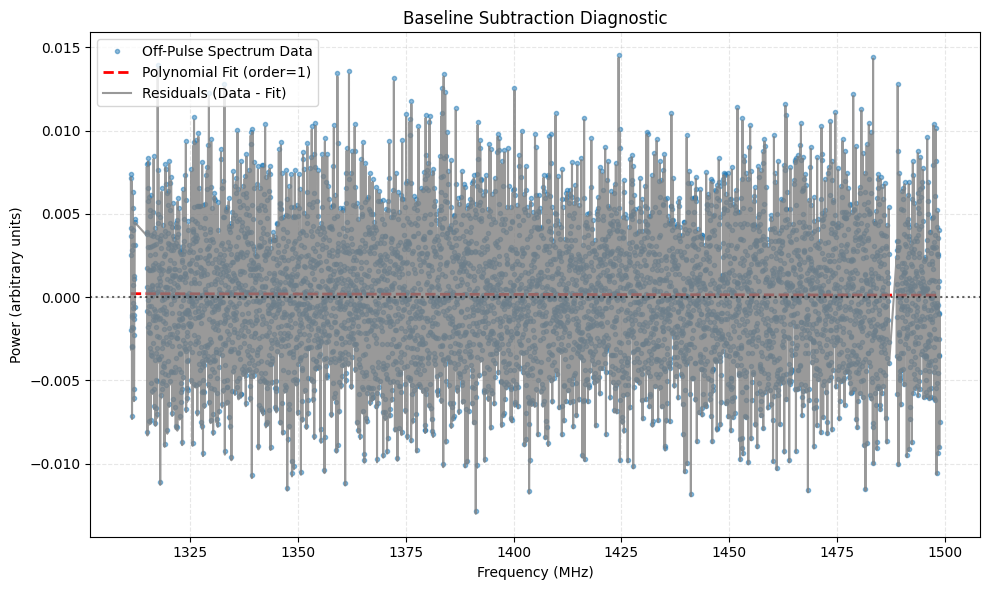

INFO: Characterizing off-pulse noise...
/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO: Noise characterization complete. Detected kind: 'flux_shiftedgamma'
INFO: Calculating ACFs for all sub-bands...
INFO: Starting sub‑band ACF calculations (self‑noise + synthetic‑noise aware).
ACF per sub‑band: 100%|██████████| 2/2 [00:00<00:00, 17.72it/s]
INFO: Running intra-pulse analysis...
INFO: Starting intra-pulse scintillation analysis...
Analyzing ACF vs. Time:   0%|          | 0/5 [00:00<?, ?it/s]/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects wit

--- Pipeline Execution Finished ---

--- Saving results to ./isha_analysis_results.json ---

--- Generating Intra-Pulse Evolution Plot ---


INFO: Intra-pulse evolution plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/isha_intra_pulse_evolution.png


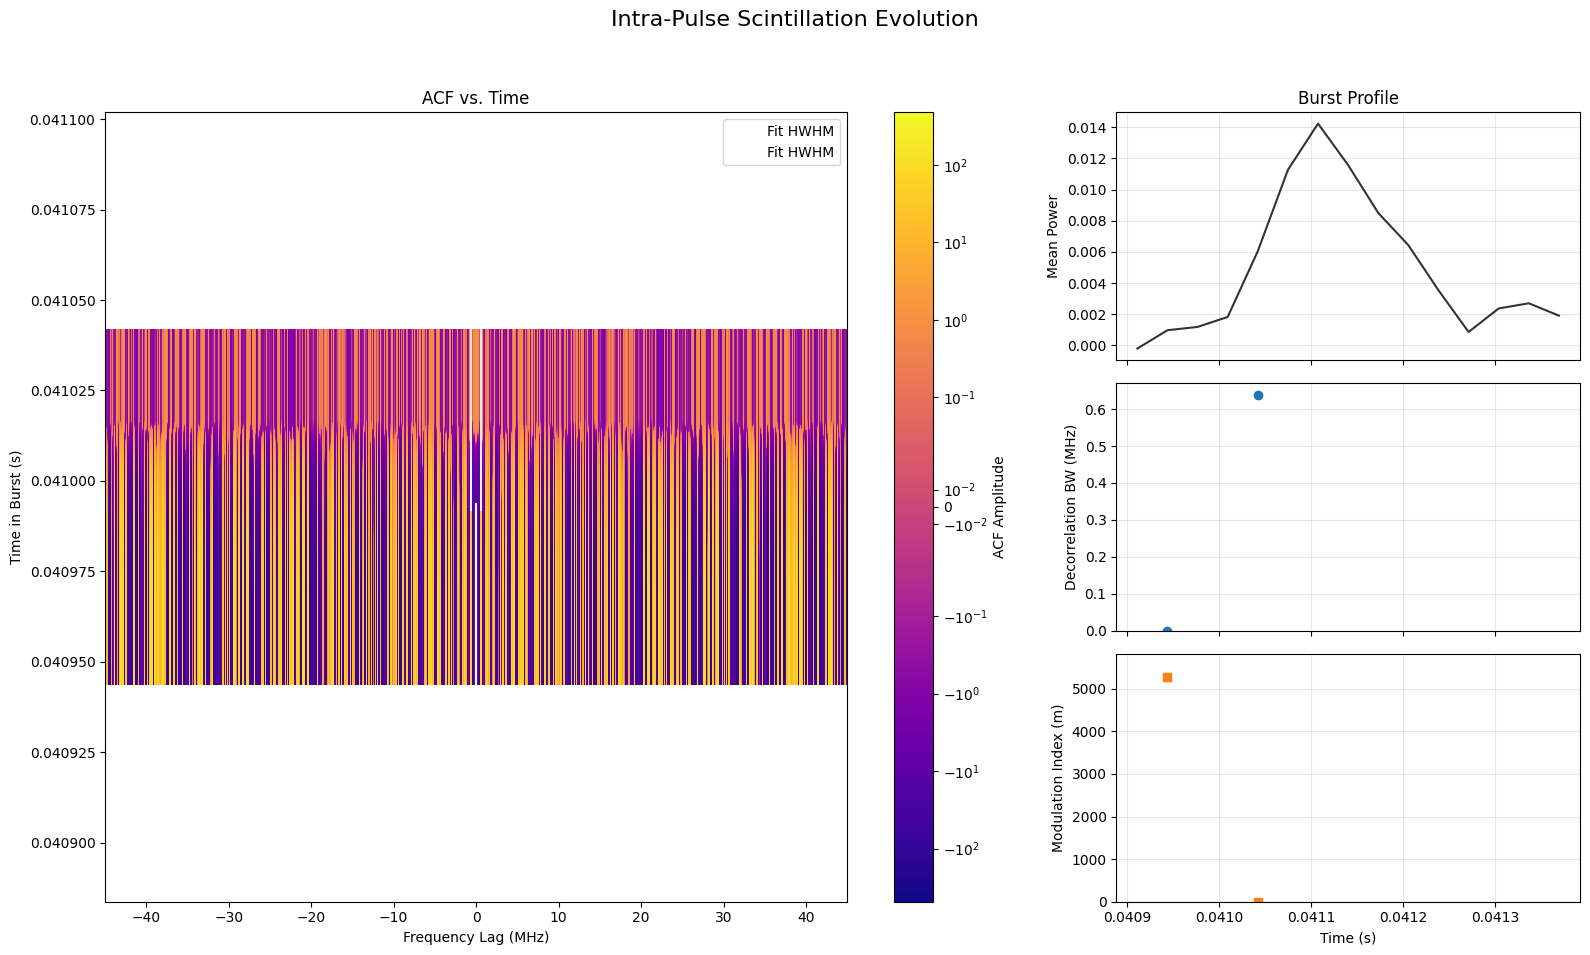

INFO: Generating full analysis overview plot.



--- Generating Final Analysis Plot ---
Saved plots to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/isha_analysis_overview.png


/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/plotting.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  on_pulse_profile,
INFO: Analysis overview plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/isha_analysis_overview.png


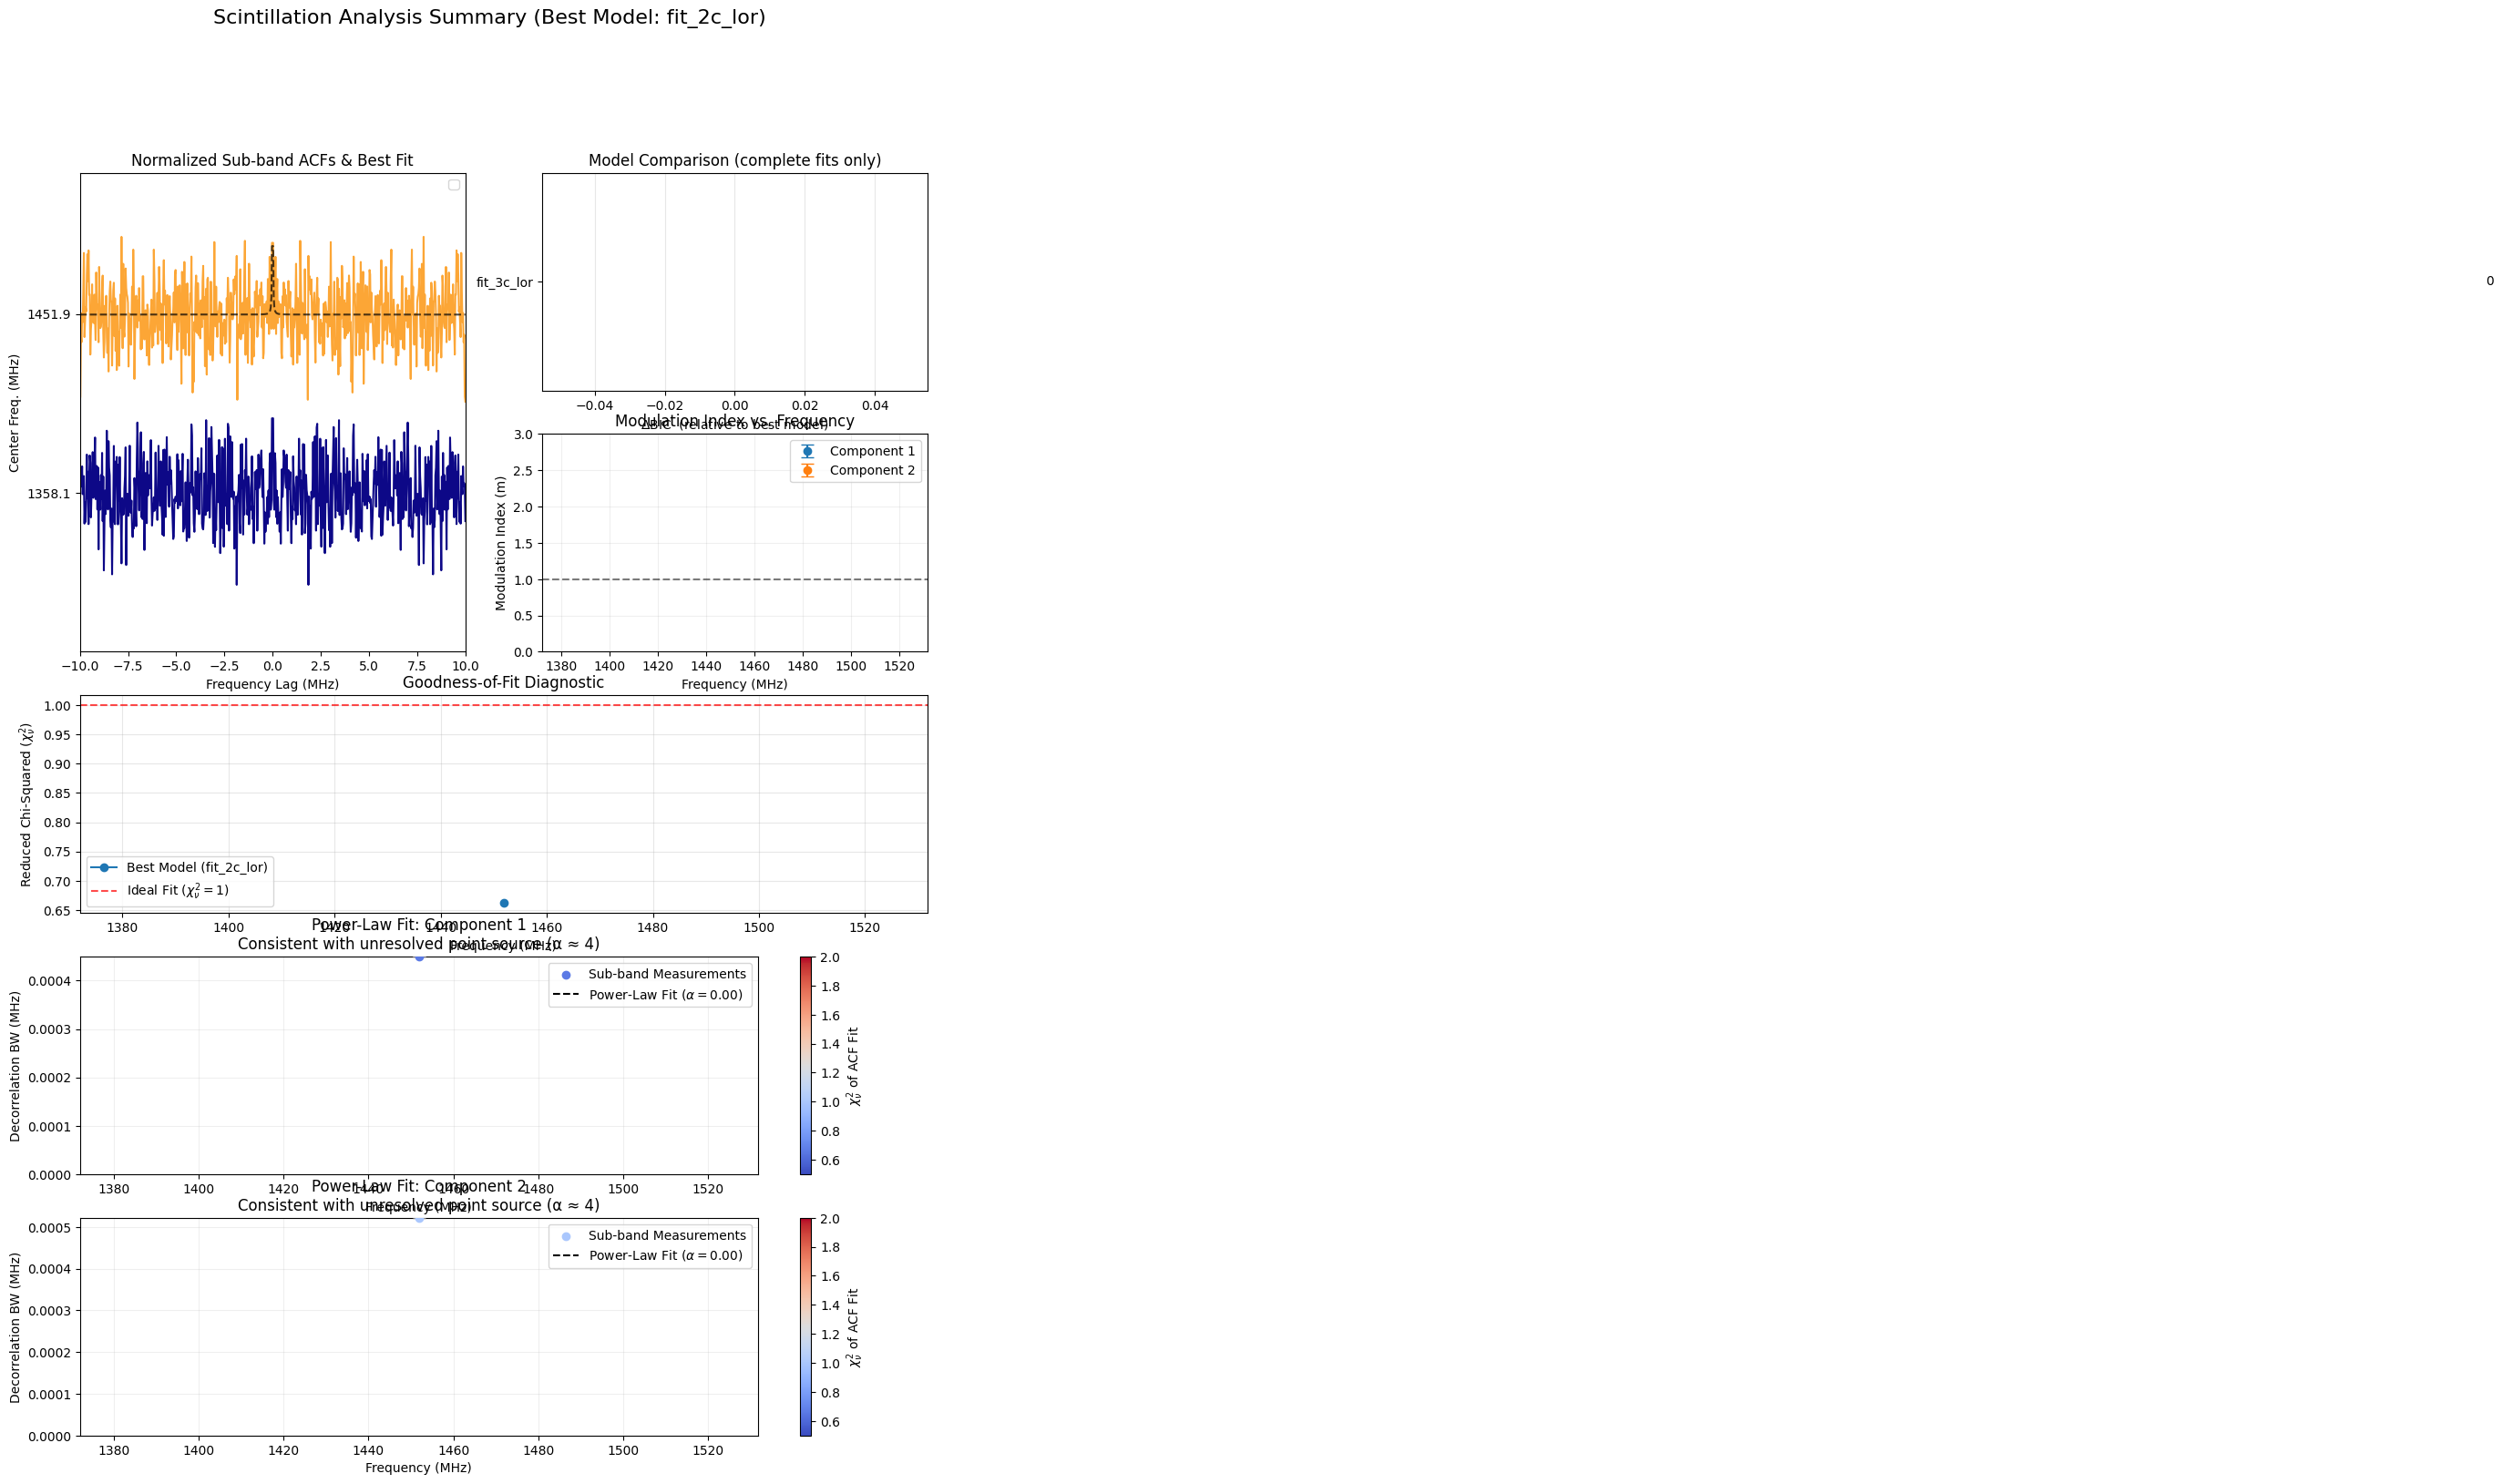

In [9]:
# Set path for module imports
import sys
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

import json
import logging
import numpy as np
import matplotlib.pyplot as plt


# Import the main pipeline components
from scint_analysis import config, pipeline, plotting
# Import your new noise model if you need to use it separately
# from scint_analysis import noise_model 

# --- 1. Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/isha_dsa.yaml'

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")
    # Stop execution if config fails
    raise

# --- 2. Initialize and Run the Pipeline ---
print("\n--- Initializing and Running Scintillation Pipeline ---")
# Create an instance of the main pipeline controller
scint_pipeline = pipeline.ScintillationAnalysis(analysis_config)

# This single .run() call executes all the steps in the correct order:
# - Loads and masks data
# - Characterizes off-pulse noise (NEW)
# - Calculates ACFs using the noise model for normalization
# - Fits all models and derives final parameters
scint_pipeline.run()
print("--- Pipeline Execution Finished ---")


# --- 3. Save and Plot Results ---
# Save the final parameters to a JSON file
if scint_pipeline.final_results:
    output_json_path = f"./{analysis_config.get('burst_id', 'output')}_analysis_results.json"
    
    print(f"\n--- Saving results to {output_json_path} ---")

    with open(output_json_path, 'w') as f:
        json.dump(scint_pipeline.final_results, f, indent=4)
        
    logging.info(f"Final results saved to {output_json_path}")

# Generate Intra-Pulse Evolution Plot
print("\n--- Generating Intra-Pulse Evolution Plot ---")

# Check if the intra-pulse analysis was run and produced results
if scint_pipeline.intra_pulse_results:
    # We need the on-pulse time series for context in the plot.
    # First, get the dynamic spectrum object from the pipeline.
    spectrum = scint_pipeline.masked_spectrum
    
    # Recalculate the burst limits to ensure we have the correct window
    # (This uses the same config parameters as the pipeline run)
    rfi_config = analysis_config.get('analysis', {}).get('rfi_masking', {})
    burst_lims = spectrum.find_burst_envelope(
        thres=rfi_config.get('find_burst_thres', 5.0),
        padding_factor=rfi_config.get('padding_factor', 2.0)
    )

    # Get the on-pulse profile and its corresponding time axis
    on_pulse_profile = spectrum.get_profile(time_window_bins=burst_lims)
    on_pulse_times = spectrum.times[burst_lims[0]:burst_lims[1]]

    # Define a path to save the new plot
    plot_options = analysis_config.get('pipeline_options', {}).get('diagnostic_plots', {})
    if plot_options.get('enable', False):
        plot_dir = plot_options.get('directory', './plots/diagnostics')
        burst_id = analysis_config.get('burst_id', 'unknown_burst')
        save_path = f"{plot_dir}/{burst_id}_intra_pulse_evolution.png"
    else:
        save_path = None

    # Call the new plotting function with the results from the pipeline
    plotting.plot_intra_pulse_evolution(
        intra_pulse_results=scint_pipeline.intra_pulse_results,
        on_pulse_profile=on_pulse_profile,
        on_pulse_times=on_pulse_times,
        save_path=save_path
    )
else:
    logging.warning("Intra-pulse analysis was not enabled in the config or produced no results. Skipping evolution plot.")

    
# Generate the final overview plot using the results stored in the pipeline object
print("\n--- Generating Final Analysis Plot ---")
if scint_pipeline.final_results and scint_pipeline.all_subband_fits:
    # Get the plot save path from the config, as we implemented
    save_path = analysis_config.get('pipeline_options', {}).get('output_plot_path')
    print(f'Saved plots to: {save_path}')
    
    plotting.plot_analysis_overview(
        analysis_results=scint_pipeline.final_results,
        acf_results=scint_pipeline.acf_results,
        all_subband_fits=scint_pipeline.all_subband_fits,
        all_powerlaw_fits=scint_pipeline.all_powerlaw_fits,
        save_path=save_path
    )
else:
    logging.warning("Pipeline did not produce final results, skipping plot.")